In [118]:
import time
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten, Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import cifar10
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
import tensorflow as tf
import multiprocessing as mp

from keras_sequential_ascii import sequential_model_to_ascii_printout

ImportError: No module named 'cgff'

# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [112]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
num_classes = 10
class_names = helper._load_label_names()

array([[ 62,  46,  48, ..., 132, 125, 124],
       [ 20,   0,   8, ...,  88,  83,  87],
       [ 24,   7,  27, ...,  84,  84,  73],
       ..., 
       [170, 153, 161, ..., 133,  31,  34],
       [139, 123, 144, ..., 148,  62,  53],
       [144, 129, 142, ..., 184, 118,  92]], dtype=uint8)

Print figure with 10 random images from cifar dataset

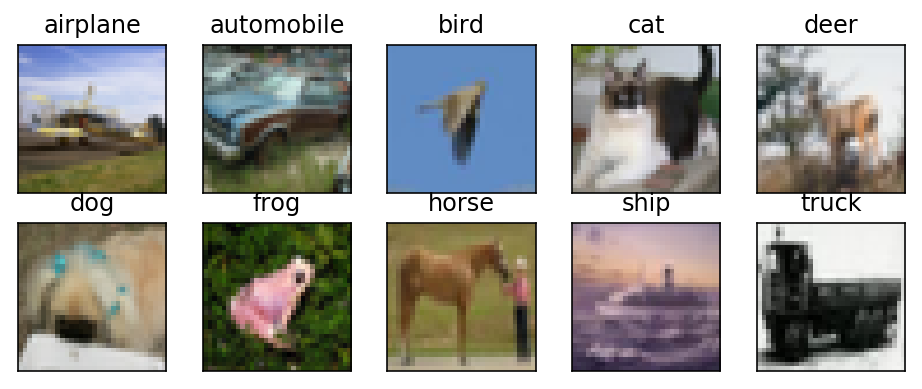

In [109]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

It’s good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255. Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [91]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

# Keras Model
A logarithmic loss function is used with the stochastic gradient descent optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.1.

### Imports

In [92]:
def base_model():
 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    # Train model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

Then we can fit this model with 100 epochs and a batch size of 32

In [104]:
# 128 examples in a mini-batch, smaller batch size means more updates in one epoch
batch_size - 128
epochs = 1 # repeat 100 times

In [ ]:
# Build model
model = base_model()
model.summary()
# Fit model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))